# Ensemble (앙상블)
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

##### ----------------------------------------------------------------------------------

# Bootstrapping

In [1]:
import numpy as np

In [11]:
# 평균 함수
def mean(inp):
    result = 0
    len_inp = len(inp)    
    for i in inp:
        result += i
    result = result / len_inp
    return result

In [12]:
# 모수 생성 (백만 개)
mom = list(np.random.normal(size = 1000000))

# 표본 생성 (만 개)
random_index = np.random.permutation(len(mom))
random_index = random_index[:10000]
son = []
for i in random_index:
    son.append(mom[i])

In [13]:
mean(mom)

0.0013716129984151758

In [14]:
# 샘플링
# inp : son
def sample(inp):
    random_index = np.random.permutation(len(inp))
    random_index = random_index[:1000]
    result = []
    for i in random_index:
        result.append(inp[i])
    return result

In [15]:
# 샘플링 평균 함수
# inp1 : son, inp2 : number of repetitions
def accumulation(inp1, inp2):
    result = []
    for i in range(inp2):
        son = mean(sample(inp1))
        result.append(son)
    result = mean(result)
    return result

In [16]:
# 반복횟수에 따른 표본들의 평균
# inp1 : son, inp2 : list of (number of. repetitions)
def compare(inp1, inp2):
    for i in inp2:
        result = accumulation(inp1, i)
        print(str(i) + ":" + str(result))

In [17]:
# 10회, 100회, 1,000회, 10,000회
cycle= [10, 100, 1000, 10000]

In [18]:
compare(son, cycle)

10:0.006572485384228684
100:0.00914482678743361
1000:0.005379378167399985
10000:0.005736361867235731


# Dataset 구축

In [20]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

## 3.데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 

## 5.분류모델구축
from sklearn.tree import DecisionTreeClassifier # 결정 트리
# from sklearn.naive_bayes import GaussianNB # 나이브 베이즈
from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃
# from sklearn.linear_model import Perceptron # 퍼셉트론
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
# from sklearn.svm import SVC # 서포트 벡터 머신(SVM)
# from sklearn.neural_network import MLPClassifier # 다층인공신경망

## 5_1.앙상블 모델 구축
from sklearn.ensemble import VotingClassifier # 과반수 투표(Majority Voting) 
from sklearn.ensemble import BaggingClassifier # 배깅(Bagging) 
from sklearn.ensemble import AdaBoostClassifier # 부스팅(Boosting) 
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트


## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

## 7.최적화
from sklearn.model_selection import cross_validate # 교차타당도
from sklearn.pipeline import make_pipeline # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝
from sklearn.model_selection import cross_val_score # 교차타당도 # 추가

In [22]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [23]:
bank_df.shape

(5000, 14)

In [24]:
# 자료구조 살펴보기
bank_df.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [25]:
# 필요한 data만 추출 & Feature와 Target으로 구분
X = bank_df.drop (['ID','ZIPCode','PersonalLoan'], axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [26]:
y = bank_df['PersonalLoan']
np.bincount(y)

array([4520,  480], dtype=int64)

### Data (X) 처리

- 문자형 자료를 숫자(범주형)로 인코딩 -> 범주형 변수를 가변수로 처리 : One Hot Encording
- 숫자형 자료를 표준화
- 단, 결정나무, 랜덤 포레스트, 나이브 베이즈 분류 : 원본데이터 그대로 유지

(가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움)

In [27]:
X['Education'] = X['Education'].replace ([1,2,3], ['Under','Grad','Prof'])
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,Under,0,1,0,0,0
1,45,19,34,3,1.5,Under,0,1,0,0,0
2,39,15,11,1,1.0,Under,0,0,0,0,0
3,35,9,100,1,2.7,Grad,0,0,0,0,0
4,35,8,45,4,1.0,Grad,0,0,0,0,1


In [28]:
X.keys()

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [29]:
X = pd.get_dummies(X[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 
                      'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']],
                   columns=['Education'],
                   drop_first = True)

X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Education_Prof,Education_Under
0,25,1,49,4,1.6,0,1,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,1,0,0


In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: PersonalLoan, Length: 5000, dtype: int64

In [31]:
pd.DataFrame(y).value_counts()

PersonalLoan
0               4520
1                480
dtype: int64

In [32]:
# train : test = 7:3 (stratified)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=2021, stratify=y)

# Bagging (Bootstrap Aggregation)

## Random Forest
- Python: CART 활용

도움링크: https://ek-koh.github.io/data%20analysis/random-forest/

In [33]:
# Decision Tree 최적화
params_tree = {
    'max_depth':[2,3,4,5,6],
    'min_samples_leaf':[10, 20, 30, 40, 50]
}

tree = DecisionTreeClassifier(random_state=2021, criterion='gini')
grid_cv_tree = GridSearchCV(tree, param_grid=params_tree, cv=10, n_jobs=-1, scoring='accuracy')
grid_cv_tree.fit(X_train, y_train)

print('DT - 최적 하이퍼 파라미터:\n', grid_cv_tree.best_params_)
print('DT - 최고 예측 정확도: {0:.4f}'.format(grid_cv_tree.best_score_))

# parameter 확인: https://injo.tistory.com/15
## 추가 도움: https://www.inflearn.com/questions/42608

DT - 최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 10}
DT - 최고 예측 정확도: 0.9840


In [34]:
# Random Forest 최적화
params_rf = {
    'n_estimators':[100, 200, 300 ,400],
    'max_depth' : [2, 3, 4, 5, 6], 
    'min_samples_leaf' : [10, 20, 30, 40, 50]
}

forest = RandomForestClassifier(random_state=2021, criterion='gini', n_jobs=-1)
grid_cv_rf = GridSearchCV(forest, param_grid=params_rf, cv=10, n_jobs=-1, scoring='accuracy')
grid_cv_rf.fit(X_train, y_train)

print('RF - 최적 하이퍼 파라미터:\n', grid_cv_rf.best_params_)
print('RF - 최고 예측 정확도: {0:.4f}'.format(grid_cv_rf.best_score_))

# parameter 확인: https://injo.tistory.com/30

RF - 최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 10, 'n_estimators': 200}
RF - 최고 예측 정확도: 0.9777


In [35]:
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=6,
                              min_samples_leaf=10,
                              random_state=2021)

forest = RandomForestClassifier(criterion='gini',
                                max_depth=6,
                                min_samples_leaf=10,
                                n_estimators=200,
                                random_state=2021)

# RandomForestClassifier 내에서의 hyper-parmeter:
# n_estimators : 랜덤 포레스트에서 사용하는 결정 트리의 개수 지정(디폴트는 100)
# max_features : 디폴트가 None이 아니라 sqrt(=auto)

clf_labels = ['Decision tree', 'Random forest']

all_clf = [tree, forest]


# Random Forest 이외에 다른 것을 쓰고 싶다면 아래의 코드 이용
# 또는, BaggingClassifier()에서 괄호 안에 base_estimator = tree 로 할 경우, Random Forest가 작동됨.
#('Random forest'자리에 'bagging' 입력)

#bagging = BaggingClassifier(base_estimator=tree, # 수정
#                            n_estimators=500,  
#                            max_samples=1.0, 
#                            max_features=1.0, 
#                            bootstrap=True, 
#                            bootstrap_features=False, 
#                            n_jobs=1, 
#                            random_state=2021)
### 파라미터 확인: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [36]:
# AUC 검정
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.978 (+/- 0.020) [Decision tree]
ROC AUC: 0.995 (+/- 0.003) [Random forest]


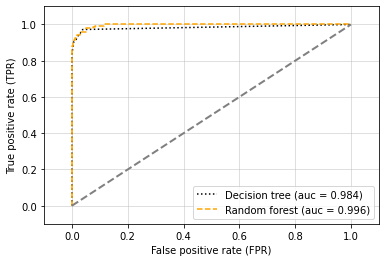

In [37]:
# ROC Curve

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [38]:
# Confusion Matrix
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_estimators=200,
                       random_state=2021)

In [39]:
y_pred = forest.predict(X_test)

In [40]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],1356,0
True[1],29,115


In [41]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 29
정확도: 0.981
정밀도: 1.000
재현율: 0.799
F1: 0.888


 1) Income                         0.372561
 2) CCAvg                          0.182276
 3) Education_Under                0.156894
 4) Family                         0.101560
 5) CDAccount                      0.077824
 6) Education_Prof                 0.044143
 7) Mortgage                       0.033100
 8) Age                            0.012785
 9) Experience                     0.012142
10) CreditCard                     0.003462
11) Online                         0.001783
12) SecuritiesAccount              0.001470


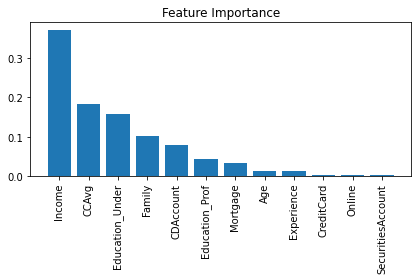

In [42]:
# Feature Importance

feat_labels = X.columns

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [43]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, 
                      threshold=0.1, 
                      prefit=True)

X_selected = sfm.transform(X_train)

print('이 임계 조건을 만족하는 Feature의 수:', X_selected.shape[1])

이 임계 조건을 만족하는 Feature의 수: 4


In [44]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Income                         0.372561
 2) CCAvg                          0.182276
 3) Education_Under                0.156894
 4) Family                         0.101560


# Boosting (Arcing; Adaptive Resampling and Combining)

## Adaboost (Adaptive boosting)

In [49]:
# Adaboost 최적화
params_adaboost = {
    'n_estimators':[50, 100, 150, 200, 250, 300, 350, 400],
    'learning_rate' : [1.0, 0.5, 0.1, 0.05, 0.01]
}

adaboost = AdaBoostClassifier(base_estimator=tree, random_state=2021)
grid_cv_adaboost = GridSearchCV(adaboost, param_grid=params_adaboost, cv=10, n_jobs=-1, scoring='accuracy')
grid_cv_adaboost.fit(X_train, y_train)

print('Adaboost - 최적 하이퍼 파라미터:\n', grid_cv_adaboost.best_params_)
print('Adaboost - 최고 예측 정확도: {0:.4f}'.format(grid_cv_adaboost.best_score_))

# parameter 확인: https://injo.tistory.com/31
# 확인2: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Adaboost - 최적 하이퍼 파라미터:
 {'learning_rate': 1.0, 'n_estimators': 50}
Adaboost - 최고 예측 정확도: 0.9874


In [83]:
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=6,
                              min_samples_leaf=10,
                              random_state=2021) # tree는 앞에서 구한 최적의 tree를 그대로 활용

adaboost = AdaBoostClassifier(base_estimator=tree, # 수정
                              n_estimators=50,
                              learning_rate = 1.0, # 수정
                              random_state=2021)

clf_labels = ['Decision tree', 'Adaboost']

all_clf = [tree, adaboost]

In [84]:
# AUC

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.978 (+/- 0.020) [Decision tree]
ROC AUC: 0.997 (+/- 0.003) [Adaboost]


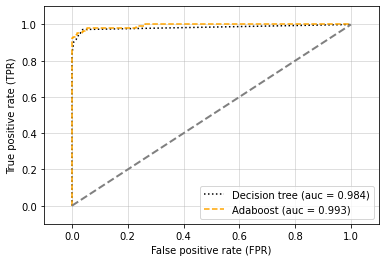

In [85]:
# ROC Curve

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [86]:
# Confusion Matrix
adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         min_samples_leaf=10,
                                                         random_state=2021),
                   random_state=2021)

In [87]:
y_pred = adaboost.predict(X_test)

In [88]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],1354,2
True[1],11,133


In [89]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 13
정확도: 0.991
정밀도: 0.985
재현율: 0.924
F1: 0.953


 1) CCAvg                          0.254341
 2) Experience                     0.182001
 3) Income                         0.131925
 4) Family                         0.093202
 5) Education_Under                0.075997
 6) Online                         0.037700
 7) Education_Prof                 0.029012
 8) Mortgage                       0.025708
 9) SecuritiesAccount              0.021360
10) CreditCard                     0.020019
11) CDAccount                      0.008910
12) Age                            0.000000


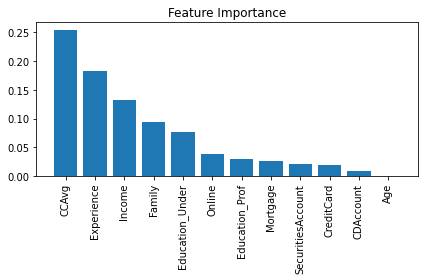

In [93]:
# Feature Importance

feat_labels = X.columns

importances = adaboost.feature_importances_
importances[np.isnan(importances)] = 0 # adaboost.feature_importances_ 확인할 경우, Age가 nan으로 나와서 0처리

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## XGBoost (eXtreme Gradient Boosting)

### 설치

"ANACONDA.NAVIGATOR" 실행 > "Environments" > "본인 (가상)환경" ▶ 클릭 > "Open Terminal" 선택 > 아래 문장을 입력:

conda install -c anaconda py-xgboost

(중간에 질문나올경우: y 입력)

설치 완료시, 다음의 문장을 마지막으로 입력하고 완료되면 끝:

pip install xgboost 로 마무리

https://lsjsj92.tistory.com/546

In [57]:
from xgboost import plot_importance
from xgboost import XGBClassifier

### 최적화

In [58]:
xgb = XGBClassifier(eval_metric='logloss',random_state=2021, use_label_encoder=False)
# use_label_encoder=False로 해야함 (이제 사용하지 않는 오래된 패키지를 끄겠다 라는 것)
## 참고: https://stackoverflow.com/questions/45251126/deprecation-warning-on-xgboost-sklearn
## 참고2: https://injo.tistory.com/44?category=1068433

xgb_param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [1.0, 0.5, 0.1, 0.05, 0.01],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8]
}

xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="accuracy", n_jobs= -1, verbose = 1)
xgb_grid.fit(X_train, y_train)

# 튜닝 참고: https://teddylee777.github.io/scikit-learn/grid-search-%EB%A1%9C-hyperparameter%EC%B5%9C%EC%A0%81%ED%99%94
# 튜닝 참고: https://www.kaggle.com/lifesailor/xgboost

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:  2.1min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     num_parallel_tree=None, random_state=2021,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                  

In [59]:
print("최고 평균 정확도 : {0:.4f}".format(xgb_grid.best_score_))
print("최고의 파라미터 : ", xgb_grid.best_params_)

최고 평균 정확도 : 0.9886
최고의 파라미터 :  {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}


In [63]:
# 최적값 적용
xgb = XGBClassifier(learning_rate = 0.5, max_depth = 3, n_estimators=50, eval_metric='logloss', random_state=2021,
                    use_label_encoder=False)



xgb.fit(X_train, y_train)
# Early Stopping을 사용할 수도 있음:
## evals = [(X_test, y_test)]
## xgb.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = "logloss", eval_set = evals, verbose = 1)
xgb_pred = xgb.predict(X_test)

In [66]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.4f}, auc : {1:.4f}'.format(f1, roc_score))

In [67]:
metrics(y_test, xgb_pred)

정확도 : 0.9887, 정밀도 : 0.9635, 재현율 : 0.9167
f1-score : 0.9395, auc : 0.9565


In [74]:
clf_labels = ['Decision tree', 'XGBoost']

all_clf = [tree, xgb]

In [75]:
# AUC

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.978 (+/- 0.020) [Decision tree]
ROC AUC: 0.997 (+/- 0.002) [XGBoost]


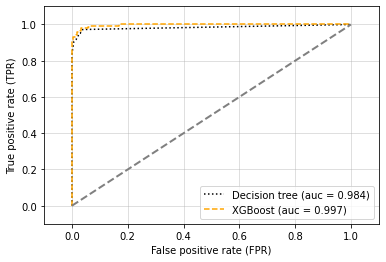

In [76]:
# ROC Curve

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [68]:
result = pd.DataFrame(xgb_grid.cv_results_)
result.sort_values(by=['rank_test_score'], inplace=True)

In [69]:
result[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
48,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.988571,1
49,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.988286,2
51,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.987714,3
44,"{'learning_rate': 0.5, 'max_depth': 2, 'n_esti...",0.987714,3
47,"{'learning_rate': 0.5, 'max_depth': 2, 'n_esti...",0.987714,3
50,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.987714,3
46,"{'learning_rate': 0.5, 'max_depth': 2, 'n_esti...",0.987429,7
95,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.987429,7
53,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.987429,7
52,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.987429,7


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

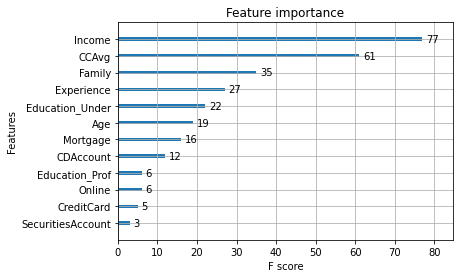

In [70]:
fig, ax = plt.subplots()
plot_importance(xgb, ax=ax)

# Appendix

# 1. Boosting 관련 함수 define 또는 hyper-parmeter 설명

- objective [기본설정값=reg:linear]: 지도학습 손실 최소화 함수를 정의

 binary:logistic: 이항 분류 문제 로직스틱 회귀모형으로 반환값이 클래스가 아니라 예측 확률.
 
 multi:softmax: 다항 분류 문제의 경우 소프트맥스(Softmax)를 사용해서 분류하는데 반횐되는 값이 예측확률이 아니라 클래스임. 또한 num_class도 지정해야함.
 
 multi:softprob: 각 클래스 범주에 속하는 예측확률을 반환함.
 
 
- eval_metric: 설정한 objective별로 기본설정값이 지정되어 있음.

 rmse: root mean square error
 
 mae: mean absolute error
 
 logloss: negative log-likelihood
 
 error: Binary classification error rate (0.5 threshold)
 
 merror: Multiclass classification error rate
 
 mlogloss: Multiclass logloss
 
 auc: Area under the curve

- seed [기본설정값: 0]: 재현가능하도록 난수를 고정시킴.

- booster: 의사결정 기반 모형(gbtree), 선형 모형(linear)
- mthread: 병렬처리에 사용되는 코어수, 특정값을 지정하지 않는 경우 자동으로 시스템 코어수를 탐지하여 병렬처리에 동원함.

- eta [기본설정값: 0.3]: GBM에 학습율과 유사하고 일반적으로 0.01 ~ 0.2 값이 사용됨
- min_child_weight [기본설정값: 1]: 과적합(overfitting)을 방지할 목적으로 사용되는데, 너무 높은 값은 과소적합(underfitting)을 야기하기 때문에 CV를 사용해서 적절한 값이 제시되어야 한다.
- max_depth [기본설정값: 6]: 과적합 방지를 위해서 사용되는데 역시 CV를 사용해서 적절한 값이 제시되어야 하고 보통 3-10 사이 값이 적용된다.
- max_leaf_nodes: max_leaf_nodes 값이 설정되면 max_depth는 무시된다. 따라서 두값 중 하나를 사용한다.
- max_delta_step [기본설정값: 0]: 일반적으로 잘 사용되지 않음.
- subsample [기본설정값: 1]: 개별 의사결정나무 모형에 사용되는 임의 표본수를 지정. 보통 0.5 ~ 1 사용됨.
- colsample_bytree [기본설정값: 1]: 개별 의사결정나무 모형에 사용될 변수갯수를 지정. 보통 0.5 ~ 1 사용됨.
- colsample_bylevel [기본설정값: 1]: subsample, colsample_bytree 두 초모수 설정을 통해서 이미 의사결정나무 모형 개발에 사용될 변수갯수와 관측점 갯수를 사용했는데 추가로 colsample_bylevel을 지정하는 것이 특별한 의미를 갖는지 의문이 듦.
- lambda [기본설정값: 1]: 능선 회쉬(Ridge Regression)의 L2 정규화(regularization) 초모수. 그다지 많이 사용되고 있지는 않음.
- alpha [기본설정값: 0]: 라쏘 회귀(Lasso Regression)의 L1 정규화(regularization) 초모수로 차원이 높은 경우 알고리즘 속도를 높일 수 있음.
- scale_pos_weight [기본설정값: 1]: 클래스 불균형이 심한 경우 0보다 큰 값을 지정하여 효과를 볼 수 있음.

- n_estimators (또는 num_boost_round): 결정트리 개수
- max_depth: 트리 깊이
- colsample_bytree: 컬럼의 샘플링 비율 (random forest의 max_features와 유사한 기능)
- subsample: weak learner가 학습에 사용하는 데이터 샘플링 비율
- learning_rate: 학습률
- min_split_loss: 리프노드를 추가적으로 나눌지 결정하는 값
- reg_lambda: L2규제
- reg_alpha: L1규제

### 참고: https://statkclee.github.io/model/model-python-xgboost-hyper.html
### 참고: https://lsjsj92.tistory.com/547
### 참고: https://xgboost.readthedocs.io/en/latest/parameter.html
### 참고: https://www.kaggle.com/lifesailor/xgboost

# 2. Stacking

In [23]:
# 여러 분류모델 구축
logistic = LogisticRegression(solver='liblinear',
                              penalty='l2',
                              C=0.001,
                              random_state=2021)

tree = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=2021)

knn = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')


voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

voting = VotingClassifier(estimators = voting_estimators,
                          voting='soft')

clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']


all_clf = [logistic, tree, knn, voting]

In [24]:
# 모델 검정: AUC

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 0.921 (+/- 0.015) [Logistic regression]
ROC AUC: 0.947 (+/- 0.016) [Decision tree]
ROC AUC: 0.694 (+/- 0.044) [KNN]
ROC AUC: 0.971 (+/- 0.009) [Majority voting]


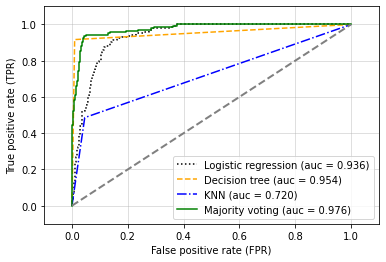

In [25]:
# ROC Curve

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

### 최적화
- Hyper-parameter tuning

In [26]:
# Grid Search
voting.get_params()

{'estimators': [('logistic',
   LogisticRegression(C=0.001, random_state=2021, solver='liblinear')),
  ('tree', DecisionTreeClassifier(criterion='entropy', random_state=2021)),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'logistic': LogisticRegression(C=0.001, random_state=2021, solver='liblinear'),
 'tree': DecisionTreeClassifier(criterion='entropy', random_state=2021),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'logistic__C': 0.001,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': 2021,
 'logistic__solver': 'liblinear',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False,
 'tree__ccp_alpha': 0.0,
 '

In [29]:
params = {'logistic__C': [0.001, 0.1, 100.0],
          'tree__max_depth': [1, 2, 3, 4, 5],
          'knn__n_neighbors': [1, 2, 3, 4, 5]}

grid = GridSearchCV(estimator=voting,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')

grid.fit(X_train, y_train)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.3f %r"
          % (grid.cv_results_['mean_test_score'][r], 
             grid.cv_results_['std_test_score'][r] / 2.0, 
             grid.cv_results_['params'][r]))

0.924 +/- 0.009 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 1}
0.953 +/- 0.007 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 2}
0.971 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 3}
0.975 +/- 0.004 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 4}
0.974 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 5}
0.944 +/- 0.007 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 1}
0.967 +/- 0.006 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 2}
0.980 +/- 0.004 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 3}
0.981 +/- 0.004 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 4}
0.979 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 5}
0.948 +/- 0.007 {'knn__n_neighbors': 1, 'logistic__C': 100.0, 'tree__max_depth': 1}
0.970 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 100.0, 'tree__max_depth': 2}
0.

In [30]:
print('최적의 파타미터: %s' % grid.best_params_)
print('ACU: %.3f' % grid.best_score_)

최적의 파타미터: {'knn__n_neighbors': 3, 'logistic__C': 100.0, 'tree__max_depth': 3}
ACU: 0.984


참고:

https://cafe.naver.com/kcbig/29

https://cafe.naver.com/kcbig/28



https://www.youtube.com/watch?v=oG9Z1aUMWtU

https://www.youtube.com/watch?v=XUHRKCmGEUY

https://www.youtube.com/watch?v=nsx3kHGVLlo

https://velog.io/@fiifa92/%EC%95%99%EC%83%81%EB%B8%94Ensemble-%EA%B8%B0%EB%B2%95


-Bootstrapping

https://pbj0812.tistory.com/319


-Majority Voting

https://www.youtube.com/watch?v=RmQuu0rsJz4


-Bagging

https://todayisbetterthanyesterday.tistory.com/50


-Random Forest

https://todayisbetterthanyesterday.tistory.com/51?category=821465


-Boosting

https://todayisbetterthanyesterday.tistory.com/52?category=821465

https://lsjsj92.tistory.com/547


https://github.com/lsjsj92/machine_learning_basic

https://towardsdatascience.com/boosting-techniques-in-python-predicting-hotel-cancellations-62b7a76ffa6c

https://github.com/lsjsj92/machine_learning_basic/blob/master/009.%20XGboost%2C%20LightGBM.ipynb

https://towardsdatascience.com/boosting-techniques-in-python-predicting-hotel-cancellations-62b7a76ffa6c